In [ ]:
import numpy as np
import pandas as pd
import math
from google.colab import drive
from IPython.core.display import Latex
import random
from time import sleep
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from skimage.transform import resize
from skimage.io import imread, imshow, imread_collection
from sklearn.utils import resample
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy import stats
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.feature_selection import SequentialFeatureSelector
import colorcet as cc

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) 
np.random.seed(7)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def reduceDimension(originalX):
  pca_dims = PCA()
  pca_dims.fit(originalX)
  cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
  d = np.argmax(cumsum >= 0.95) + 1
  pca = PCA(n_components = d)
  reducedX = pca.fit_transform(originalX)
  recoveredX = pca.inverse_transform(reducedX)
  return reducedX, recoveredX, pca

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto3-IA/dataset_tissue.txt')
df_ = df.iloc[:,:]
df_ = df_.to_numpy()
df_t = df_.T
label = df_t[0,:]
X = df_t[1:,:]
print(df_t)
print(label.shape)
print(X.shape)

[['1007_s_at' '1053_at' '117_at' ... '91826_at' '91920_at' '91952_at']
 [10.1912666822211 6.04046250272039 7.44740927631719 ... 9.21116303052509
  8.33913007018526 7.36779705423511]
 [10.5091673351314 6.69607547976383 7.77535403522073 ... 9.41598030255139
  8.21442605889894 7.9177537650076]
 ...
 [9.98450196102648 6.71598441482043 7.12079300949137 ... 8.7538532945399
  8.35568089180645 7.90771851786415]
 [9.937738353465 6.83617944179752 7.12581141265523 ... 8.19553660318869
  8.58933649257043 7.62787245027238]
 [10.3067812624519 7.02554735729723 7.40762352414932 ... 9.42253456685574
  8.33397952681913 8.05655340745588]]
(22215,)
(189, 22215)


In [ ]:
clases = pd.read_csv('/content/drive/MyDrive/Proyecto3-IA/clases')
clases_np = clases["class"].to_numpy()
print(np.unique(clases_np,return_counts=True))

(array(['cerebellum', 'colon', 'endometrium', 'hippocampus', 'kidney',
       'liver', 'placenta'], dtype=object), array([38, 34, 15, 31, 39, 26,  6]))


In [ ]:
#knn = KMeans(n_clusters=7)
#sfs = SequentialFeatureSelector(knn, n_jobs=-1)
#sfs.fit(X, clases_np)
#sfs.get_support()
#selected = sfs.transform(X)
#print(selected.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

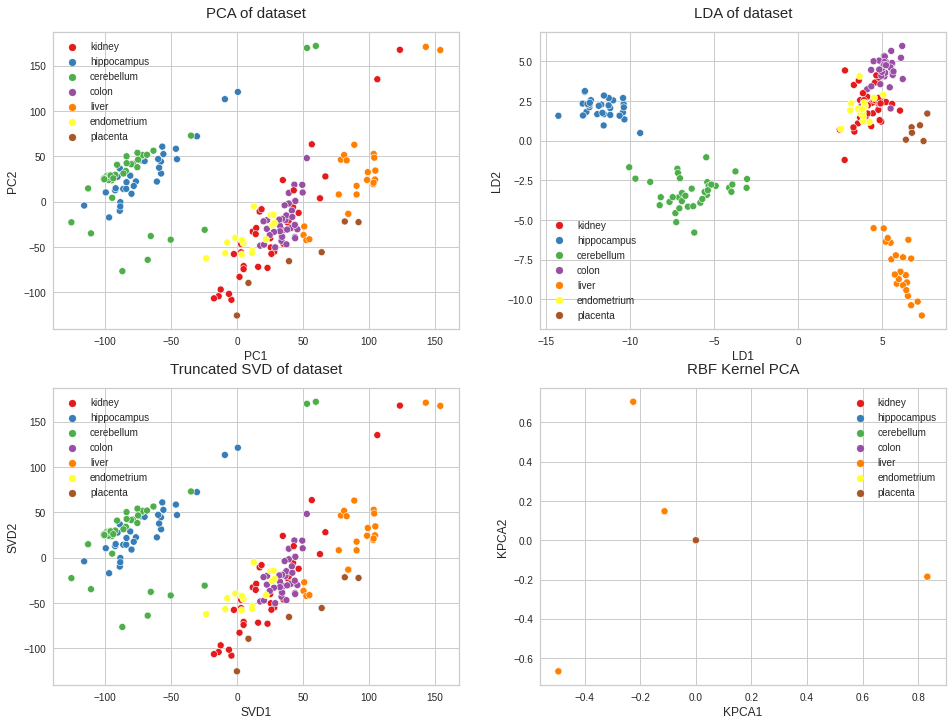

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, clases_np)


svd = TruncatedSVD(n_components=2, algorithm='arpack',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16 ,12))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=clases_np, palette='Set1', ax=ax[0,0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=clases_np, palette='Set1', ax=ax[0,1])
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=clases_np, palette='Set1', ax=ax[1,0])
sns.scatterplot(X_kpca[:, 0], X_kpca[:, 1], hue=clases_np, palette='Set1', ax=ax[1,1])
ax[0,0].set_title("PCA of dataset", fontsize=15, pad=15)
ax[0,1].set_title("LDA of dataset", fontsize=15, pad=15)
ax[1,0].set_title("Truncated SVD of dataset", fontsize=15, pad=15)
ax[1,1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0,0].set_xlabel("PC1", fontsize=12)
ax[0,0].set_ylabel("PC2", fontsize=12)
ax[0,1].set_xlabel("LD1", fontsize=12)
ax[0,1].set_ylabel("LD2", fontsize=12)
ax[1,0].set_xlabel("SVD1", fontsize=12)
ax[1,0].set_ylabel("SVD2", fontsize=12)
ax[1,1].set_xlabel("KPCA1", fontsize=12)
ax[1,1].set_ylabel("KPCA2", fontsize=12)
plt.savefig('/content/drive/MyDrive/Proyecto3-IA/PCA_vs_LDA_vs_SLS.png', dpi=200)

Variance 95.33992532635264
(189, 22215)
(189, 113)


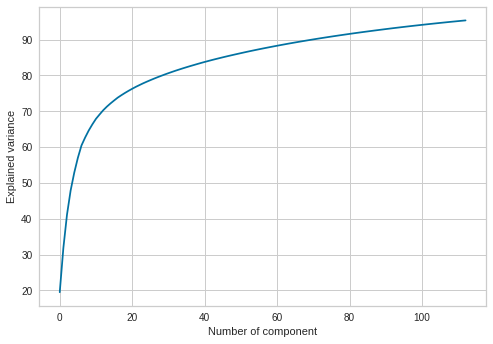

In [ ]:
pca = PCA(n_components=113)
X_pca = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of component")
plt.ylabel("Explained variance")
print("Variance", np.cumsum(pca.explained_variance_ratio_*100)[112])
print(X_scaled.shape)
print(X_pca.shape)

Variance 88.57119673368905
(189, 22215)
(189, 4)


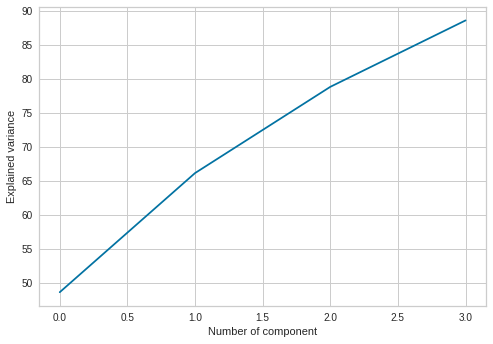

In [ ]:
i=4
lda = LinearDiscriminantAnalysis(n_components=i)
X_lda = lda.fit_transform(X_scaled, clases_np)

plt.plot(np.cumsum(lda.explained_variance_ratio_ * 100))
plt.xlabel("Number of component")
plt.ylabel("Explained variance")
print("Variance", np.cumsum(lda.explained_variance_ratio_*100)[i-1])
print(X_scaled.shape)
print(X_lda.shape)

Variance 95.36796092234287
(189, 22215)
(189, 113)


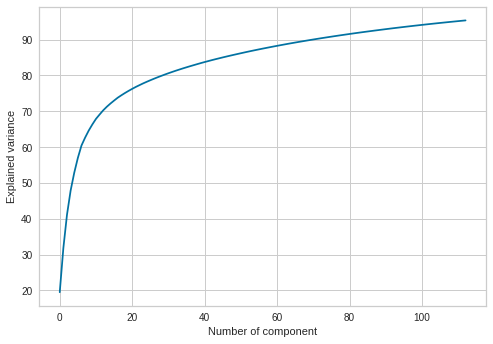

In [ ]:
SVD = TruncatedSVD(n_components=113)
X_SVD = SVD.fit_transform(X_scaled, clases_np)

plt.plot(np.cumsum(SVD.explained_variance_ratio_ * 100))
plt.xlabel("Number of component")
plt.ylabel("Explained variance")
print("Variance", np.cumsum(SVD.explained_variance_ratio_*100)[112])
print(X_scaled.shape)
print(X_SVD.shape)

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)
print(X_kpca)

[[-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000 0.000]
 [-0.000

In [ ]:
def label_predictions(labels, clases):
  #retorna array (total real, total de moda, moda)
  results = []
  range_ = np.unique(labels)
  print(range_)
  for i in range_:
    preds = clases[labels==i]
    results.append((preds.shape[0], stats.mode(preds)[1][0],stats.mode(preds)[0][0]))
  return results

In [ ]:
reduced = X_SVD
print(reduced.shape)

(189, 113)


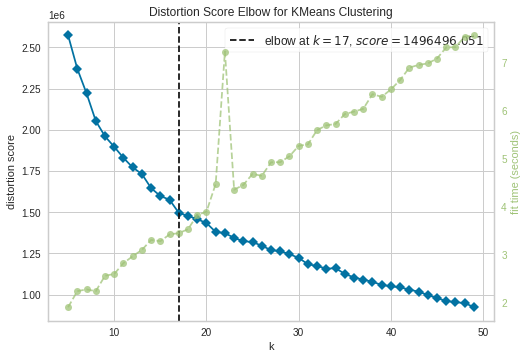

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,50), locate_elbow=True)

visualizer.fit(X_scaled)       
visualizer.show() 

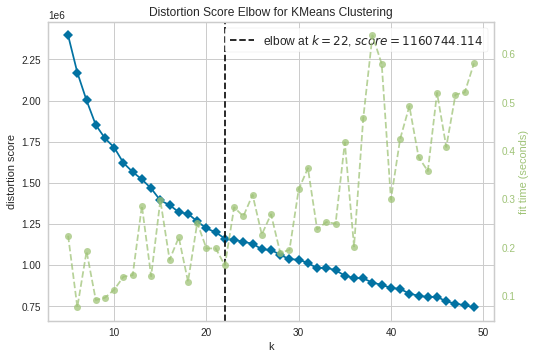

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,50), locate_elbow=True)

visualizer.fit(X_pca)       
visualizer.show() 

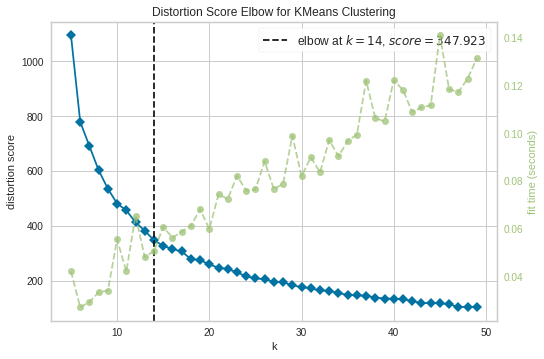

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,50), locate_elbow=True)

visualizer.fit(X_lda)       
visualizer.show() 

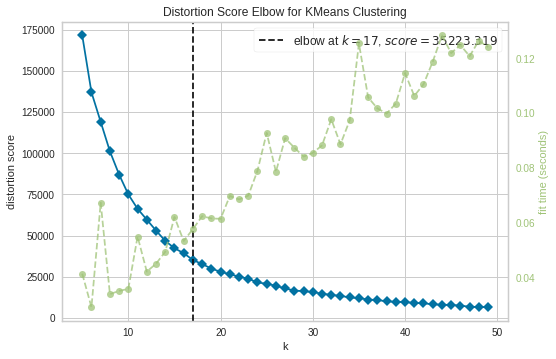

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,50), locate_elbow=True)

visualizer.fit(X_svd)       
visualizer.show() 

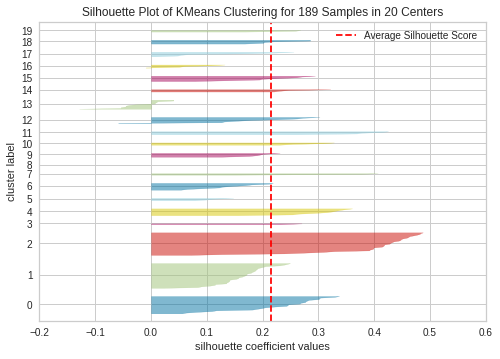

In [ ]:
model = KMeans( 20,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()   

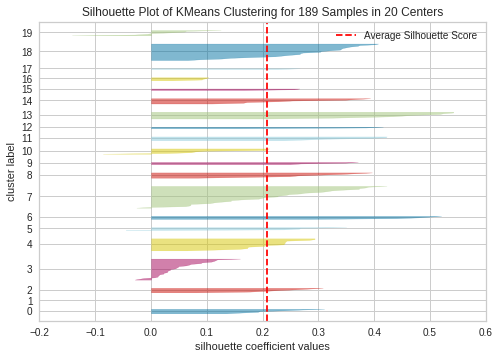

In [ ]:
model = KMeans( 20,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()   

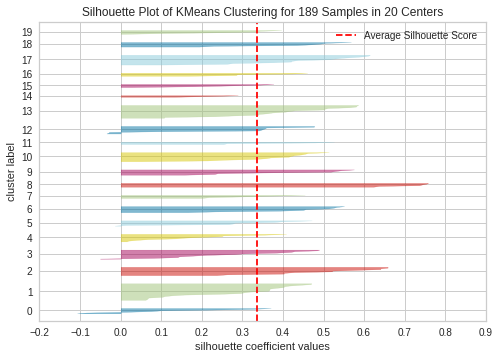

In [ ]:
model = KMeans( 20,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_lda)        # Fit the data to the visualizer
visualizer.show()   

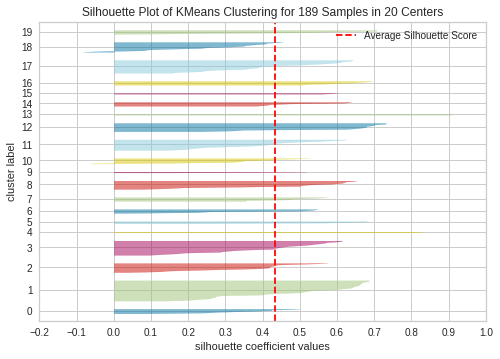

In [ ]:
model = KMeans( 20,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_svd)        # Fit the data to the visualizer
visualizer.show()   

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 2 2 2 1 1 1 2 2 2 1 1 1 2 2 0 6 1 1 1 1 1 1 4 4 4 4 4 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 3 3
 3 3 3 3]
[0 1 2 3 4 5 6]
0.2257304391342642
[(31, 31, 'cerebellum'), (24, 24, 'liver'), (57, 37, 'kidney'), (6, 6, 'placenta'), (6, 2, 'cerebellum'), (34, 34, 'colon'), (31, 31, 'hippocampus')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scaled - Kmeans')

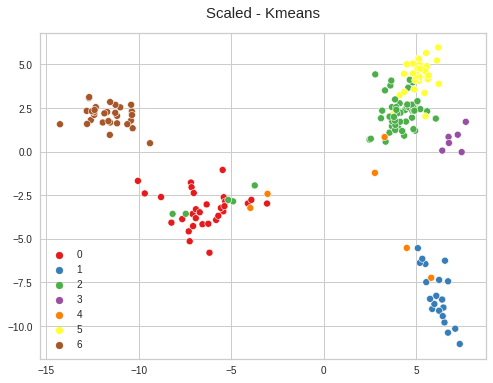

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=36, init="random", n_init=100, max_iter=1000, algorithm="elkan").fit(X_scaled)
print(kmeans.labels_)
r = label_predictions(kmeans.labels_, clases_np)
print(silhouette_score(reduced, clases_np))
print(r)
""" Variaciones
init{‘k-means++’, ‘random’}
n_init [10-200]
max_iter [300-1000]
algorithm{auto, “elkan”, full}
"""

SVD2 = LinearDiscriminantAnalysis(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=kmeans.labels_, palette='Set1', ax=ax)
ax.set_title("Scaled - Kmeans", fontsize=15, pad=15)



[ 0  0  1  7  7  1  7  1  0  1  0  1  0  1  7  1 11 11 11 21 11 11 11 21
 11 11 15 15 15 15 15 21 21 15 21 21 21 21 11 21 21 21 21 21 21 21 20 20
  4  4 20 20  4 20  4 20 20  4 20  4  4  4 20  4 20  4 20  4 20  4 20  4
  4  1  0  0  1  0  0  0  0  1  0  0  0  0 18 12 18 16 18 12 12 12 12 18
 18 18 12 19 19 18 18 18 12 19 18 18 12 18 19 18 18 18 12 18 12 12 12 19
  1  1 19  3  3  3  1  1  1  3  3  3 19 19 20 15  3 10 10 10  6 10  8  8
  8  8  8  8 14 14 14 14 14 14 14 14  9  9  9  9  9  9  9  2 10  2 10  2
  2 10 10  2 10  2  6 13 13 13 13 13  4  4  4  5  5  5 17 17 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
0.22581410010297576
[(15, 15, 'kidney'), (15, 15, 'kidney'), (6, 6, 'liver'), (7, 7, 'liver'), (17, 17, 'cerebellum'), (3, 3, 'placenta'), (2, 2, 'liver'), (4, 4, 'kidney'), (6, 2, 'cerebellum'), (7, 7, 'endometrium'), (9, 9, 'liver'), (9, 9, 'hippocampus'), (12, 12, 'colon'), (5, 5, 'cerebellum'), (8, 8, 'endometrium'), (7, 7, 'hippocampus'), (1, 1, 'co

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA - Kmeans')

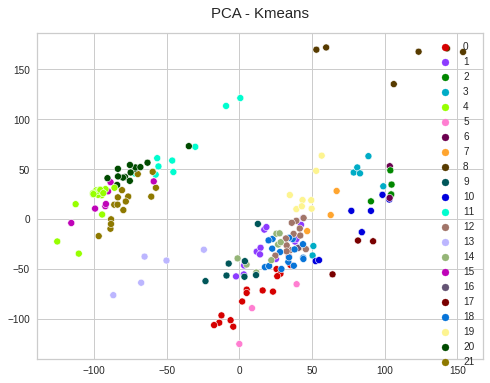

In [ ]:
kmeans = KMeans(n_clusters=22, random_state=36, init="random", n_init=100, max_iter=1000, algorithm="elkan").fit(X_pca)
print(kmeans.labels_)
r = label_predictions(kmeans.labels_, clases_np)
print(silhouette_score(X_pca, clases_np))
print(r)
""" Variaciones
init{‘k-means++’, ‘random’}
n_init [10-200]
max_iter [300-1000]
algorithm{auto, “elkan”, full}
"""

SVD2 = PCA(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled)
palette = sns.color_palette(cc.glasbey, n_colors=22)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=kmeans.labels_, palette=palette, ax=ax)
ax.set_title("PCA - Kmeans", fontsize=15, pad=15)



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 4 4 4 4 6
 4 4 4 4 4 4 4 4 4 2 2 6 3 3 3 2 2 2 3 3 3 6 6 0 5 3 3 3 3 3 3 0 0 3 3 6 2
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 1 1
 1 1 1 1]
[0 1 2 3 4 5 6]
0.2257304391342642
[(38, 38, 'cerebellum'), (6, 6, 'placenta'), (35, 35, 'kidney'), (26, 26, 'liver'), (32, 32, 'colon'), (31, 31, 'hippocampus'), (21, 15, 'endometrium')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'LDA - Kmeans')

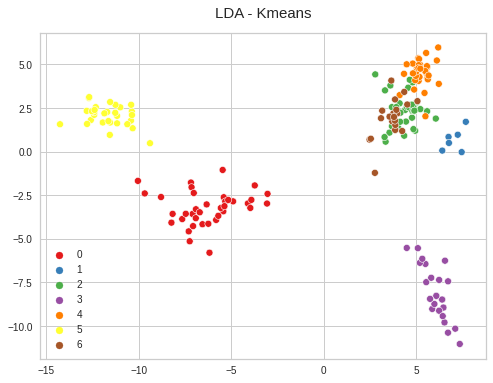

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=36, init="random", n_init=100, max_iter=1000, algorithm="elkan").fit(X_lda)
print(kmeans.labels_)
r = label_predictions(kmeans.labels_, clases_np)
print(silhouette_score(reduced, clases_np))
print(r)
""" Variaciones
init{‘k-means++’, ‘random’}
n_init [10-200]
max_iter [300-1000]
algorithm{auto, “elkan”, full}
"""

SVD2 = LinearDiscriminantAnalysis(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=kmeans.labels_, palette='Set1', ax=ax)
ax.set_title("LDA - Kmeans", fontsize=15, pad=15)

[1 1 2 3 2 2 3 2 1 2 1 2 2 2 2 2 6 5 6 4 6 6 6 5 6 6 5 5 5 5 4 5 5 5 5 5 4
 5 5 5 5 4 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1
 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 3 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 1 2 1 2 3 2 2 2 6 5 3 2 3 2 3 3 0 0 0 0 0 0
 2 1 1 2 2 1 2 2 1 1 2 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 1 4 4 4 4 5 4 4 1 1
 1 2 2 3]
[0 1 2 3 4 5 6]
-0.0031653520793178506
[(6, 2, 'cerebellum'), (31, 16, 'kidney'), (60, 30, 'colon'), (26, 20, 'liver'), (10, 6, 'cerebellum'), (47, 27, 'cerebellum'), (9, 7, 'hippocampus')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SVD - Kmeans')

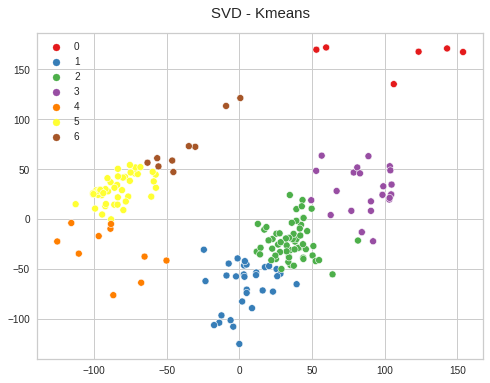

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=36, init="random", n_init=100, max_iter=1000, algorithm="elkan").fit(X_svd)
print(kmeans.labels_)
r = label_predictions(kmeans.labels_, clases_np)
print(silhouette_score(X_svd, clases_np))
print(r)
""" Variaciones
init{‘k-means++’, ‘random’}
n_init [10-200]
max_iter [300-1000]
algorithm{auto, “elkan”, full}
"""

SVD2 = TruncatedSVD(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=kmeans.labels_, palette='Set1', ax=ax)
ax.set_title("SVD - Kmeans", fontsize=15, pad=15)



[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5
 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 1 1 1 0 0 0 1 1 1 0 0 0 1 1 2 3 0 0 0 0 0 0 6 6 6 6 6 6
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 2 2 2 5 5
 5 0 0 0]
[0 1 2 3 4 5 6]
[(27, 24, 'liver'), (23, 15, 'endometrium'), (31, 31, 'cerebellum'), (36, 31, 'hippocampus'), (34, 34, 'colon'), (32, 29, 'kidney'), (6, 2, 'cerebellum')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA - GMM')

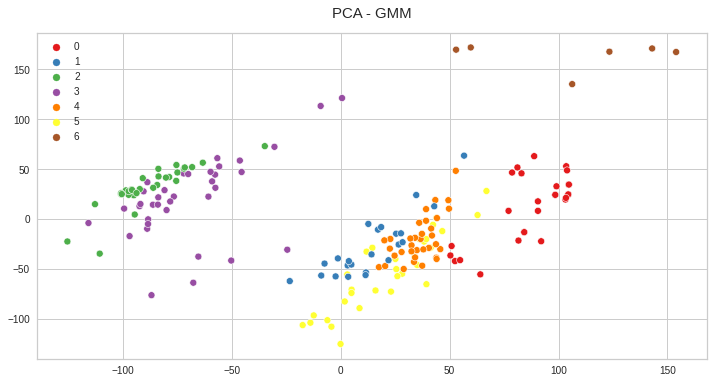

In [ ]:
gm = GaussianMixture(n_components=7, random_state=0).fit(X_pca)
labels_gmm = gm.predict(X_pca)
print(labels_gmm)
r = label_predictions(labels_gmm, clases_np)
print(r)
"""Variaciones
covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}
init_params{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’},
"""
SVD = PCA(n_components=2)
X_pca2 = SVD.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=labels_gmm, palette='Set1', ax=ax)
ax.set_title("PCA - GMM", fontsize=15, pad=15)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 1 1 5 0 0 0 1 1 1 0 0 0 1 1 3 2 0 0 0 0 0 0 3 3 0 0 5 1
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 6 6
 6 6 6 6]
[0 1 2 3 4 5 6]
[(26, 26, 'liver'), (37, 37, 'kidney'), (31, 31, 'hippocampus'), (38, 38, 'cerebellum'), (34, 34, 'colon'), (17, 15, 'endometrium'), (6, 6, 'placenta')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'LDA - GMM')

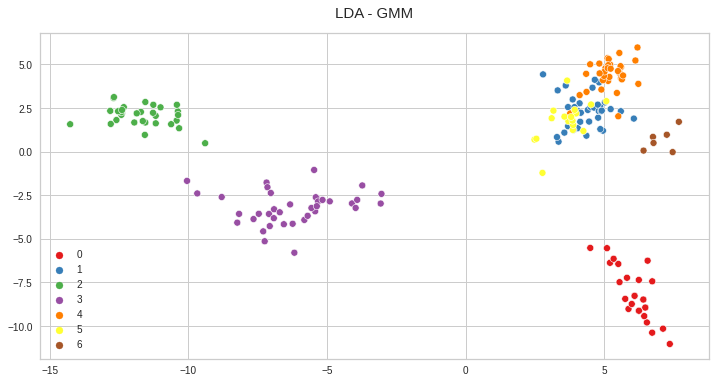

In [ ]:
gm = GaussianMixture(n_components=7, random_state=0).fit(X_lda)
labels_gmm = gm.predict(X_lda)
print(labels_gmm)
r = label_predictions(labels_gmm, clases_np)
print(r)
"""Variaciones
covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}
init_params{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’},
"""
SVD = LinearDiscriminantAnalysis(n_components=2)
X_pca2 = SVD.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=labels_gmm, palette='Set1', ax=ax)
ax.set_title("LDA - GMM", fontsize=15, pad=15)


[2 4 4 0 4 4 0 4 4 4 4 4 4 4 4 4 1 1 3 5 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5
 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 2 2 2 4 0 4 4 4 1 1 0 4 0 4 0 0 3 3 6 6 6 6
 4 2 2 4 4 2 4 4 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 1 5 5 2 2
 4 4 0 0]
[0 1 2 3 4 5 6]
[(26, 20, 'liver'), (55, 29, 'cerebellum'), (26, 14, 'kidney'), (4, 2, 'cerebellum'), (64, 33, 'colon'), (10, 7, 'cerebellum'), (4, 2, 'kidney')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SVD - GMM')

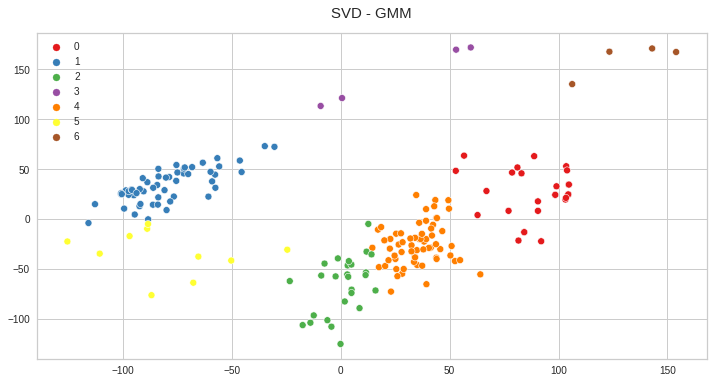

In [ ]:
gm = GaussianMixture(n_components=7, random_state=0).fit(X_svd)
labels_gmm = gm.predict(X_svd)
print(labels_gmm)
r = label_predictions(labels_gmm, clases_np)
print(r)
"""Variaciones
covariance_type{‘full’, ‘tied’, ‘diag’, ‘spherical’}
init_params{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’},
"""
SVD = TruncatedSVD(n_components=7)
X_pca2 = SVD.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=labels_gmm, palette='Set1', ax=ax)
ax.set_title("SVD - GMM", fontsize=15, pad=15)


Text(0, 0.5, 'Distance')

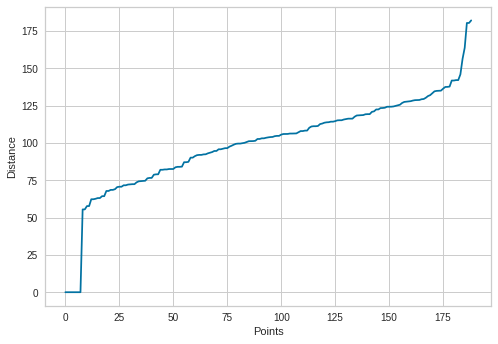

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

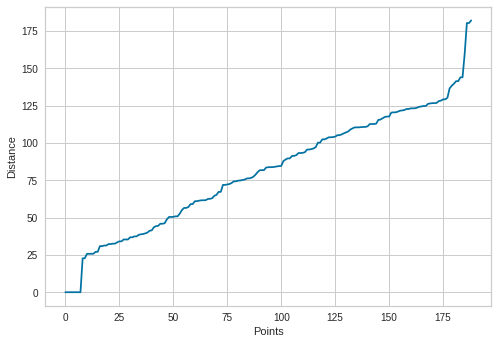

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

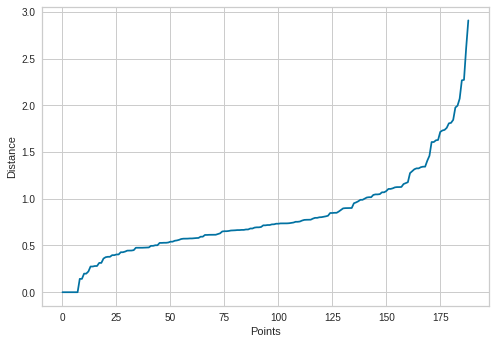

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(X_lda)
distances, indices = neighbors.kneighbors(X_lda)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

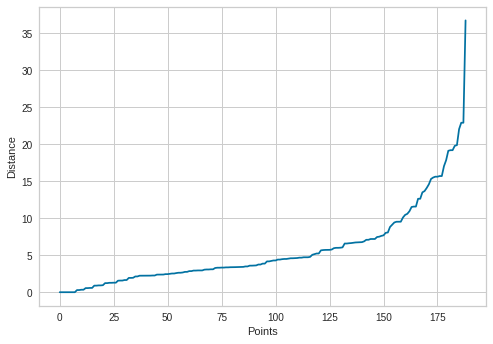

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(X_svd)
distances, indices = neighbors.kneighbors(X_svd)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

[ 0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0 -1  2  0  2  2  2  2  0  2  2  2  2  3  3  3 -1  3 -1  3  3  3  3
  3 -1  3  3  3  3  3  3 -1  3  3  3 -1 -1  3  3  3  3  3  3  3  3  3  3
  0  0  0  4  4  4  0  0  0  4 -1  4  0  0  1  1 -1  5  5  5 -1  5 -1 -1
 -1 -1 -1 -1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  5  5 -1  5  5
 -1  5  5  5  5  5  5  7  7  7  7  7  1 -1  1 -1 -1 -1 -1 -1 -1]
[-1  0  1  2  3  4  5  6  7]
[(29, 7, 'liver'), (25, 25, 'kidney'), (59, 30, 'cerebellum'), (9, 9, 'kidney'), (28, 28, 'colon'), (5, 5, 'liver'), (14, 14, 'liver'), (15, 15, 'endometrium'), (5, 5, 'cerebellum')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA - DBSCAN')

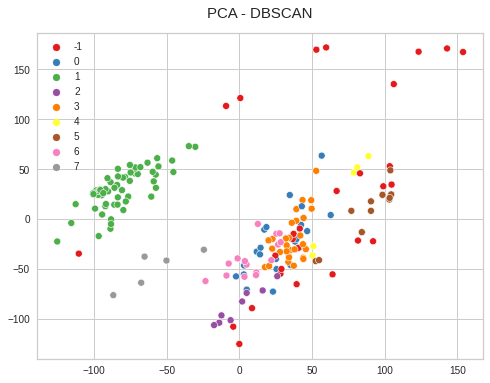

In [ ]:
dbscan = DBSCAN(eps=125, min_samples=3).fit(X_pca)
print(dbscan.labels_)
r = label_predictions(dbscan.labels_, clases_np)
print(r)
"""Variaciones
eps [2-0.0001]
metric [euclidean, manhatan, coseno, minkowski]
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
"""
SVD2 = PCA(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=dbscan.labels_, palette='Set1', ax=ax)
ax.set_title("PCA - DBSCAN", fontsize=15, pad=15)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2 -1  2  2  2  2 -1  2  2  2  2  2  2  2  4  2  2  2  2
  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  3  3  3  0  0 -1  3  3  3  0  0  2 -1  3  3  3  3  3  3  4  4
  3  3 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  3  3  3  3  3
  3  3  3  3  3  3  3  2  2  2  2  4  2  2  2  5  5  5  5  5  5]
[-1  0  1  2  3  4  5]
[(7, 2, 'cerebellum'), (84, 37, 'kidney'), (30, 30, 'hippocampus'), (32, 32, 'cerebellum'), (26, 26, 'liver'), (4, 4, 'cerebellum'), (6, 6, 'placenta')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA - DBSCAN')

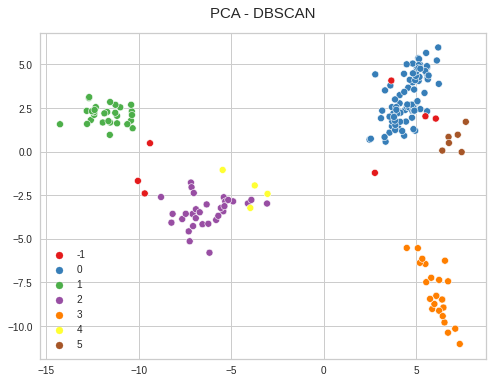

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=3).fit(X_lda)
print(dbscan.labels_)
r = label_predictions(dbscan.labels_, clases_np)
print(r)
"""Variaciones
eps [2-0.0001]
metric [euclidean, manhatan, coseno, minkowski]
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
"""
SVD2 = LinearDiscriminantAnalysis(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=dbscan.labels_, palette='Set1', ax=ax)
ax.set_title("PCA - DBSCAN", fontsize=15, pad=15)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0 -1 -1
  2  2  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0]
[-1  0  1  2]
[(5, 2, 'cerebellum'), (121, 37, 'kidney'), (60, 31, 'cerebellum'), (3, 2, 'liver')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'LDA - DBSCAN')

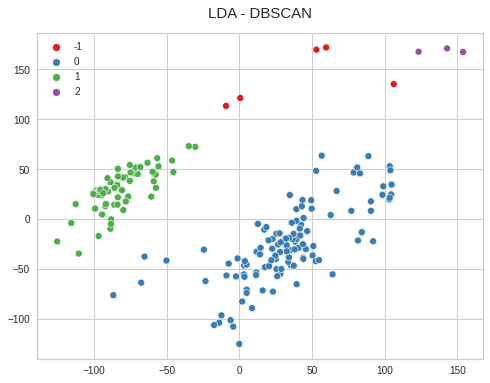

In [ ]:
dbscan = DBSCAN(eps=30, min_samples=3).fit(X_svd)
print(dbscan.labels_)
r = label_predictions(dbscan.labels_, clases_np)
print(r)
"""Variaciones
eps [2-0.0001]
metric [euclidean, manhatan, coseno, minkowski]
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
"""
SVD2 = TruncatedSVD(n_components=2)
X_pca2 = SVD2.fit_transform(X_scaled, clases_np)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8 ,6))
sns.scatterplot(X_pca2[:,0], X_pca2[:,1], hue=dbscan.labels_, palette='Set1', ax=ax)
ax.set_title("LDA - DBSCAN", fontsize=15, pad=15)


[161 159 170 133 141 138  95 134  96 174 105 160 143  47 126 154  97 111
 131  79 127 181 153 156 146 173 155 110 164 135 128 144  71 113 149  94
 150  63 140 132 148 122  66  92 117 116 169 151 182 172 175 158 115 147
 168 183 177 167  74  86 171  90 121 180 157 178 162 166 123  85 118 179
  73 137 119  89  99 107 129  84 125 130  36 108  83  76 120 163 106  77
  42 176 104 114  41  98 139 165  53  57  58  59 103 152 142  78  60 101
 145  64 109 102  68 100  48  81  51  88  52  72  87  28  75  80  38  37
 184  39  82  91  69  54  70  43 112  44  93 124  20  55  21 136  65  23
  32  26  49  62  35  56  67  50  27  31  61  13  40  24  17  18   8  45
  29   2   1   0   3   2   0   3   1  30  46  22  25  10  34  19  33  14
   6  12   9  11   4  15  16   7   5]
(189, 22215)


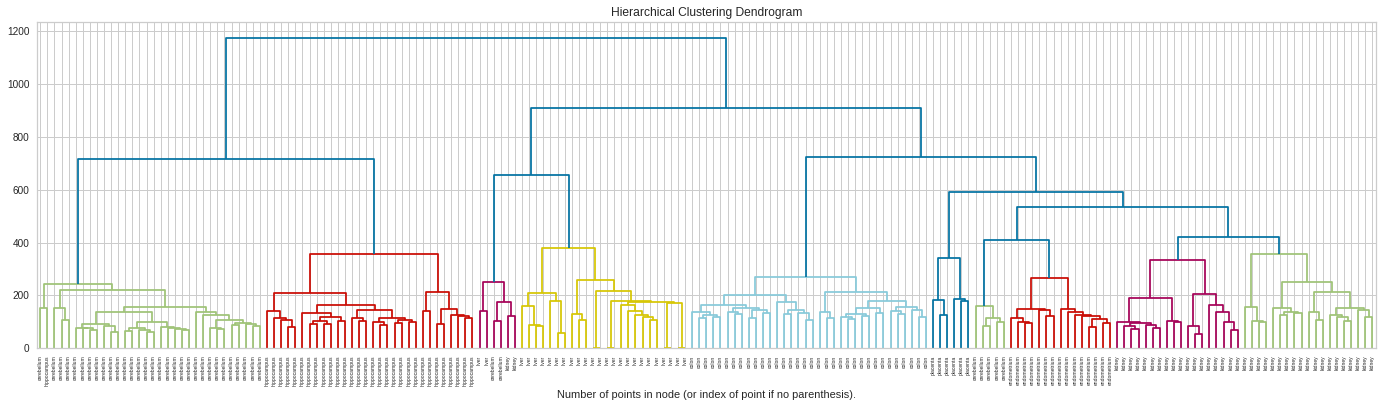

'Variaciones\naffinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]\nlinkage{‘ward’, ‘complete’, ‘average’, ‘single’}\ncompute_distances=true\n'

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

aglomerative = AgglomerativeClustering(distance_threshold=True, n_clusters=None).fit(X_scaled)
print(aglomerative.labels_)

fig = plt.gcf()
fig.set_size_inches(24, 6)
print(X_scaled.shape)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aglomerative, p=2, show_contracted=True, labels=clases_np, color_threshold=400)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


"""Variaciones
affinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]
linkage{‘ward’, ‘complete’, ‘average’, ‘single’}
compute_distances=true
"""

[177 101 173 136 138 133  97 146 100 180 105 169  99 143 163 157 175 119
 131 159 176 109 158 153 183  49 120 116 162 147 125 144 142 132 152 149
 135 130 134 126 140 154 122 165 117 104 170 148 184  87 178 155 108  98
 164 110 171 150  74 168 166 179 106  88 160 172 156  81  92 145  65  43
 139  71  59  91  89 113 127 111 121 128  84 114  62 151 118  75  78 161
  82 137 102  50  77 174  67  38 141  54 167 112 103  85  69  79  48  72
  35  60  95 107  96 123 181  86  56  83 124  63  45  41  93  40  42  80
 182  76  39  90  20  73  70  94 115  37  19  61  46  36  44  66  32  53
 129  51  22  58  17  55  34  52  25  27  57  26   9  29  47  64  18  28
  30   2   1   0   3   2   0   3   1  13   8  21  23  10  68   4  14  24
  31  12   6  11   5  33  16  15   7]
(189, 22215)


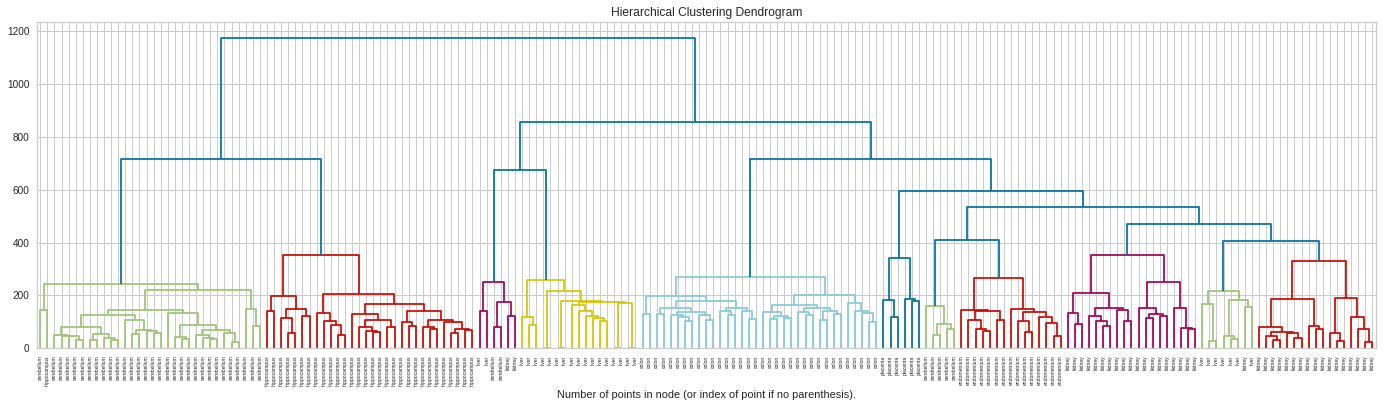

'Variaciones\naffinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]\nlinkage{‘ward’, ‘complete’, ‘average’, ‘single’}\ncompute_distances=true\n'

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

aglomerative = AgglomerativeClustering(distance_threshold=True, n_clusters=None).fit(X_pca)
print(aglomerative.labels_)

fig = plt.gcf()
fig.set_size_inches(24, 6)
print(X_scaled.shape)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aglomerative, p=2, show_contracted=True, labels=clases_np, color_threshold=400)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


"""Variaciones
affinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]
linkage{‘ward’, ‘complete’, ‘average’, ‘single’}
compute_distances=true
"""

[109  74  93   1  19   1  84  63   3  55  28  17  19  25  98  17   2   2
  67  38  95   2   9  27  35   7  35   9   9   9  27  32   9 106   7  79
   8   2  91  32   7   8  67  38   2   7 100  16  77 103 101  96  66 102
  87  70  30  41 104  56  30  16 107  90  57  68  16  89  60   0  94  57
  50  64  51   6  55  64  25  69   6  82  19  88   1  84  80  12  21  52
  18   5  12 108  10  33  33  20  10  52  23  20  33  52  42  78  42  10
  61  44   5  12  20  21  10  23  33  18  23  23   6  28  99  37  31  29
  53   6  81  75  39  49  47  92  86  71  58  22  13  36  31  36  62  14
  29  37  83   3   4  48  26  46  48  65  46   4   4  11  24  11  76  45
  26  13  73  13  73  13  13  73  73 105  72  22  72  16  41  54  85  14
   0  43  59  40  15  34  34  15  97]
(189, 22215)


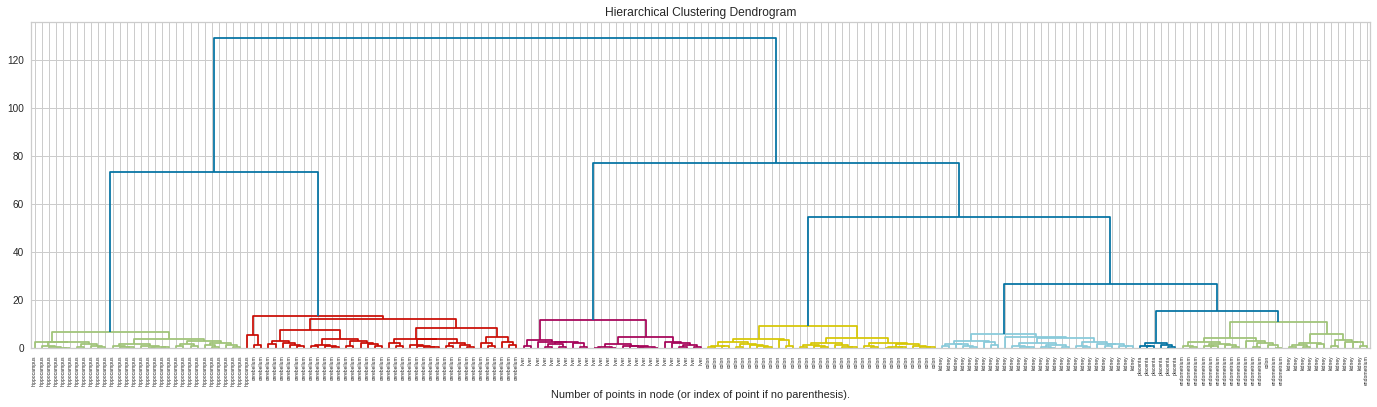

'Variaciones\naffinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]\nlinkage{‘ward’, ‘complete’, ‘average’, ‘single’}\ncompute_distances=true\n'

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

aglomerative = AgglomerativeClustering(distance_threshold=True, n_clusters=None).fit(X_lda)
print(aglomerative.labels_)

fig = plt.gcf()
fig.set_size_inches(24, 6)
print(X_scaled.shape)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aglomerative, p=2, show_contracted=True, labels=clases_np, color_threshold=15)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


"""Variaciones
affinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]
linkage{‘ward’, ‘complete’, ‘average’, ‘single’}
compute_distances=true
"""

[150 108 166 135   1 142  91   2 147 159 151   9 163 173 107 148 165 171
 153  98 152 164 100 116  96 136 134 170 104 157 115 125 167 101 121 105
 119 133 146  97  95 169  57 139  66 154 176 131 177   4 174 141 162  99
  81  73 149 112 113  86   3 114 129 143 128 178 130 103 140   4  74   3
 145  82  56  92 144 106  72 138  49 120 172  71 102   0 175 124 126   1
  51 111 158 122   9  76   0   2 127 123  88 118  75  37  67  62  61 110
  63 137  89 168  78  45  94  70 160  35 132  65 155  83  50  68  53  59
  85  87 117 109  55  27  58  60  40  52  90 161 156  29  69  42  54  26
  80  36  84  93  77  24  79  41  64  34  32  46  38  33  25  39  48  12
  19   6  10   7  20   6   7  20  10  44  28  22  47  30  31  23  14  16
  18  13  15  17  11   5  43  21   8]
(189, 22215)


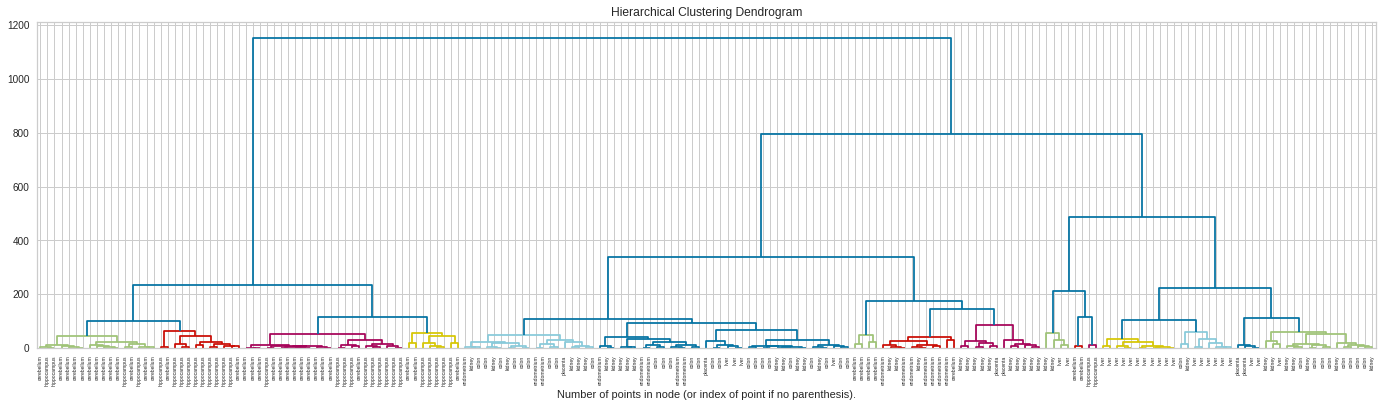

'Variaciones\naffinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]\nlinkage{‘ward’, ‘complete’, ‘average’, ‘single’}\ncompute_distances=true\n'

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

aglomerative = AgglomerativeClustering(distance_threshold=True, n_clusters=None).fit(X_svd)
print(aglomerative.labels_)

fig = plt.gcf()
fig.set_size_inches(24, 6)
print(X_scaled.shape)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aglomerative, p=2, show_contracted=True, labels=clases_np, color_threshold=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


"""Variaciones
affinity [euclidean”, “l1”, “l2”, “manhattan”, “cosine”,]
linkage{‘ward’, ‘complete’, ‘average’, ‘single’}
compute_distances=true
"""